## Wstęp do algorytmiki

#### Zadanie 1
Napisz funkcję, która zwraca pole kwadratu o zdanym boku.

In [1]:
def area(a: int) -> int:
    return a**2

# Przykład użycia
# area(4) -> 16
# area(400) -> 160000

In [2]:
area(4)

16

In [3]:
area(400)

160000

#### Zadanie 2
Znajdź największy wspólny dzielnik dwóch zadanych liczb.

In [13]:
# Algorytm Euklidesa (opis słowny)

# Dla dwóch liczb a, b
# 1. powtarzaj dopóki b>0
#       a -> b
#       b -> a%b
# 2. zwróć a

def nwd(a: int, b: int) -> int:
    while b > 0:
        a, b = b, a%b
        
    return a

# Przykład użycia
# nwd(16, 24) -> 8
# nwd(16, 16) -> 16  # najlepszy przypadek

In [14]:
nwd(16, 24)

8

In [15]:
nwd(16, 16)

16

W jaki sposób możemy ocenić jakość naszego algorytmu?

#### Zadanie 3

Napisz funkcję która zsumuje wszystkie elementy od $1$ do $n$, gdzie $n$ jest parametrem wejściowym funkcji.

In [18]:
# rozwiązanie iteracyjne
def sum1(n: int) -> int:
    '''
    Take an input of n and return the sum of the numbers from 0 to n
    '''
    res = 0  # 1

    # n razy
    for num in range(n+1):  # 1
        res += num  # 1

    return res

In [19]:
sum1(100)  # 5050

5050

Ale, być może niektórzy z nas pamiętają jeszcze z podstawowego kursu matematyki wzór na sumę ciągu arytmetycznego.

$$ \sum_{i=0}^{n} {i} = \frac{n(n+1)}{2} $$

W oparciu o ten wzór możemy napisać inne, analityczne rozwiązanie.

In [20]:
def sum2(n):
    """
    Take an input of n and return the sum of the numbers from 0 to n
    """
    return n*(n+1)/2

In [21]:
sum2(100)

5050.0

Oba rozwiązania są poprawne. Ale w jaki sposób możemy porównać ze sobą oba algorytmy ?

Jednym ze sposobów może być analiza porównawcza.

## Analiza porównawcza

Analiza porównawcza (*ang. benchmarking*) to technika polegająca na wielokrotnym wykonaniu analizowanego algorytmu dla stałych parametrów wejściowych, a następnie wyliczeniu średniego czasu działania tego algorytmu.

W Pythonie mamy specjalne narzędzia pozwalające w prosty sposób wykonywać analizę porównawczą. W szczególności notatnik Jupter posiada wśród tzw. "magicznych komend" komendy dedykowane do analizy porównawczej: **%timeit**. Zobaczmy jak to działa.

In [26]:
%timeit sum1(10000)

746 μs ± 133 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [27]:
%timeit sum2(10000)

222 ns ± 28.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Widzimy, że algorytm `sum2` rozwiązuje zadanie wielokrotnie szybciej niż algorytm `sum1`, a wraz ze wzrostem $n$ spodziewamy się, że ta różnica będzie tylko większa.

Ale czy ten sposób analizy jest niezawodny? \
Niestety nie. Zależy od maszyny, na którym uruchamiamy algorytm, od oprogramowania, które jest zainstalowane na tej maszynie, a nawet od zajętości zasobów (procesora) na tej maszynie. 

Czy w takim razie istnieje inny, bardziej niezawodny sposób na porównanie dwóch algorytmów? \
Tak, służy do tego tzw. złożoność obliczeniowa algorytmu.

## Złożoność obliczeniowa

### Co to złożoność obliczeniowa (**ang. computational complexity**) ?

Złożność obliczeniowa algorytmu to miara określająca jak bardzo zwiększa się złożoność algorytmu wraz ze wzrostem wielkości parametru wejściowego. Podstawowy podział wyróżnia:
- Czasową złożoność obliczenioweą (**ang. time computational complexity**) \
  Opisuje tempo wzrostu liczby operacji w funkcji rozmiaru wartości wejściowych. Innymi słowy czasowa złożność obliczeniowa mówi jak bardzo zwiększa się liczba potrzebnych do wykonania operacji wraz ze wzrostem rozmiaru parametru wejściowego (bardzo często tym parametrem jest kolekcja i wtedy patrzymy jak zmienia się liczba potrzebnych do wykonania operacji wraz ze wzrostem wielkości kolekcji).
- Pamięciowa złożoność obliczeniowa (**ang. memory computational complexity**) \
  Opisuje jak zmienia się ilość pamięci wykorzystywanej przez algorytm do działania wraz ze wzrostem rozmiary parametru wejściowego.

Spójrzmy na algorytm `sum1`.

Jeżeli n=1 to wykonamy:

```
    final_sum = 0  # 1
    for x in range(n+1):  # 3 
        final_sum += x  # 1
    
    return final_sum
```

5 operacje.

Jeżeli n=10 to wykonamy:

```
    final_sum = 0  # 1
    for x in range(n+1):  # 30 
        final_sum += x  # 10
    
    return final_sum
```

41 operacji

Jeżeli n = 100 to wykonamy:

```
    final_sum = 0  # 1
    for x in range(n+1):  # 300
        final_sum += x  # 100
    
    return final_sum
```

401 operacji

A jak wygląda to w przypadku algorytmu `sum2` ?

Dla n = 1 mamy:

```
    return (n*(n+1))/2  # 3
```

3 operacje

Dla n = 10 mamy:

```
    return (n*(n+1))/2  # 3
```

3 operacje

Dla n = 100 mamy:

```
    return (n*(n+1))/2  # 3
```

3 operacje

Zbierzmy to do tabelki i uzupełnijmy o jeszcze kilka wartości:


| n | Liczba potrzebnych operacji w `sum1` | Liczba potrzebnych operacji w `sum2` |
|---|:---:|:---:|
| 1 | 5 | 3 |
| 10 | 41 | 3 |
| 50 | 101 | 3 |
| 100 | 401 | 3 |
| 150 | 301 | 3 |
| 200 | 401 | 3 |
| 1000 | 4001 | 3 |

I to nazywamy czasową złożonością obliczeniową algorytmu.

Tak wygląda sytuacja z użyciem procesora, czyli liczbą operacji, które musi wykonać procesor w funkcji wielkości parametru wejściowego `n`. A jak wygląda sytuacja z użyciem pamięci przez oba algorytmy ?

Jeżeli n=1 to potrzebujemy:

```
    final_sum = 0  # 1
    for x in range(n+1):  # 1 
        final_sum += x
    
    return final_sum
```

2 komórki pamięci.

Jeżeli n=10 to potrzebujemy:

```
    final_sum = 0  # 1
    for x in range(n+1):  # 1 
        final_sum += x
    
    return final_sum
```

2 komórki pamięci.

Jeżeli n=100 to potrzebujemy:

```
    final_sum = 0  # 1
    for x in range(n+1):  # 1 
        final_sum += x
    
    return final_sum
```

2 komórki pamięci.

A w przypadku funkcji `sum2` ?

Jeżeli n=1 to potrzebujemy:

```
    return (n*(n+1))/2  # 1
```

1 komórkę pamięci.

Jeżeli n=10 to potrzebujemy:

```
    return (n*(n+1))/2  # 1
```

1 komórkę pamięci.

Jeżeli n=100 to potrzebujemy:

```
    return (n*(n+1))/2  # 1
```

1 komórkę pamięci.

Zróbmy analogiczną tabelkę dla użycia pamięci.

| n | Liczba potrzebnych operacji w `sum1` | Liczba potrzebnych operacji w `sum2` |
|---|:---:|:---:|
| 1 | 2 | 1 |
| 10 | 2 | 1 |
| 50 | 2 | 1 |
| 100 | 2 | 1 |
| 150 | 2 | 1 |
| 200 | 2 | 1 |
| 1000 | 2 | 1 |

To nazywamy pamięciową złożoność obliczeniowa naszych algorytmów. 

Tak wygląda sytuacja z użyciem pamięci komputera przez nasze algorytmy w funkcji wielkości parametru wejściowego `n`.

I moglibyśmy zakończyć na takim opisie słowno-tabelarycznym, ale opracowano bardzo wygodną notację do określania złożoności obliczeniowej, tzw. **notację dużego O**.

## Notacja big-O
https://en.wikipedia.org/wiki/Big_O_notation

Notacja dużego O aka asymptotyczne tempo wzrostu, notacja Landaua, notacja Bachmanna–Landaua (*ang. big O notation aka asymptotic notation, Landau notation, Bachmann–Landau notation*) jest zwięzłym sposobem zapisu złożoności obliczniowej algorytmu i w skrócie polega na wskazaniu dominującego czynnika w złożoności obliczeniowej algorytmu.

Mamy tabelki. 

Takie tabelki można przedstawić w postaci wykresów.

In [29]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/d2/92/c2b9464a0562feb6ae780bdc152364810862e07ef5e6affa2b7686028db2/matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a1/35/c2de8823211d07e8a79ab018ef03960716c5dff6f4d5bff5af87fd682992/contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/aa/d1/5f007861cab890f2a35a19a1d2a2815655ec10b0ea7fd881b1d3aaab0076/fonttools-4.55.0-cp312-cp312-win_amd64.whl.metadata
   


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


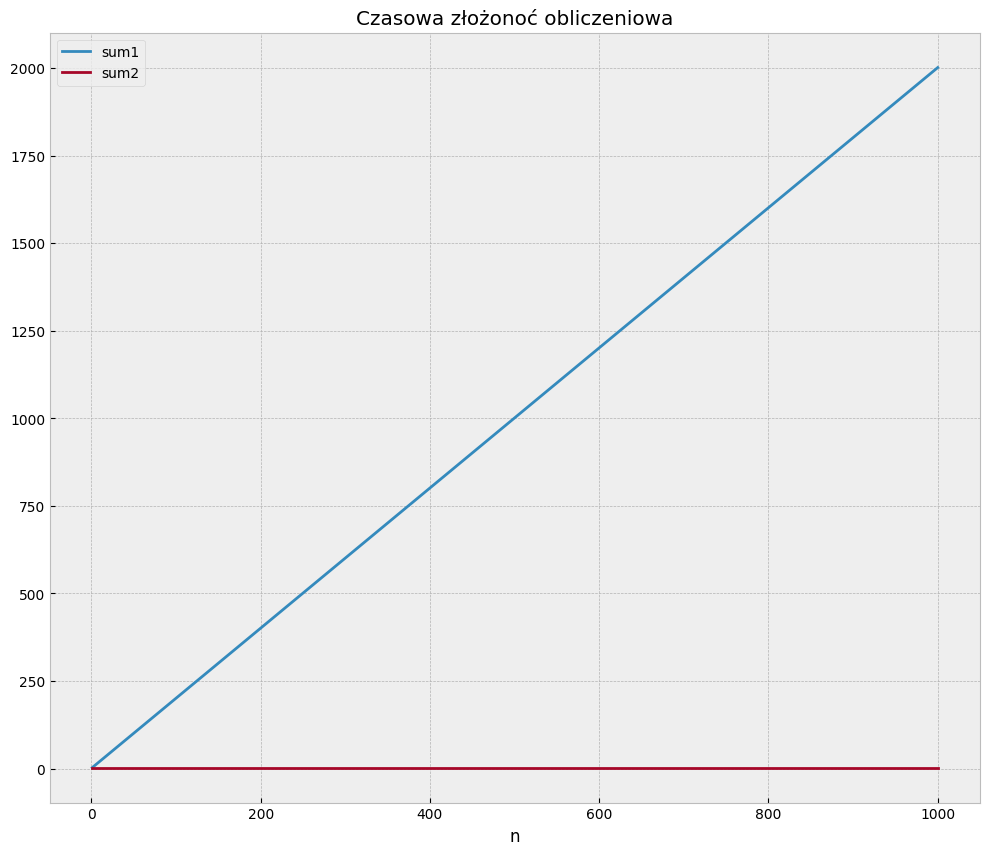

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Set up runtime comparisons
n = np.linspace(1,1000,1000)
labels = ['sum1','sum2']
big_o = [2*n+1,3*np.ones(n.shape)]

# Plot setup
plt.figure(figsize=(12,10))

for i in range(len(big_o)):
    plt.plot(n,big_o[i],label = labels[i])

plt.legend(loc=0)
plt.title('Czasowa złożonoć obliczeniowa')
plt.xlabel('n');

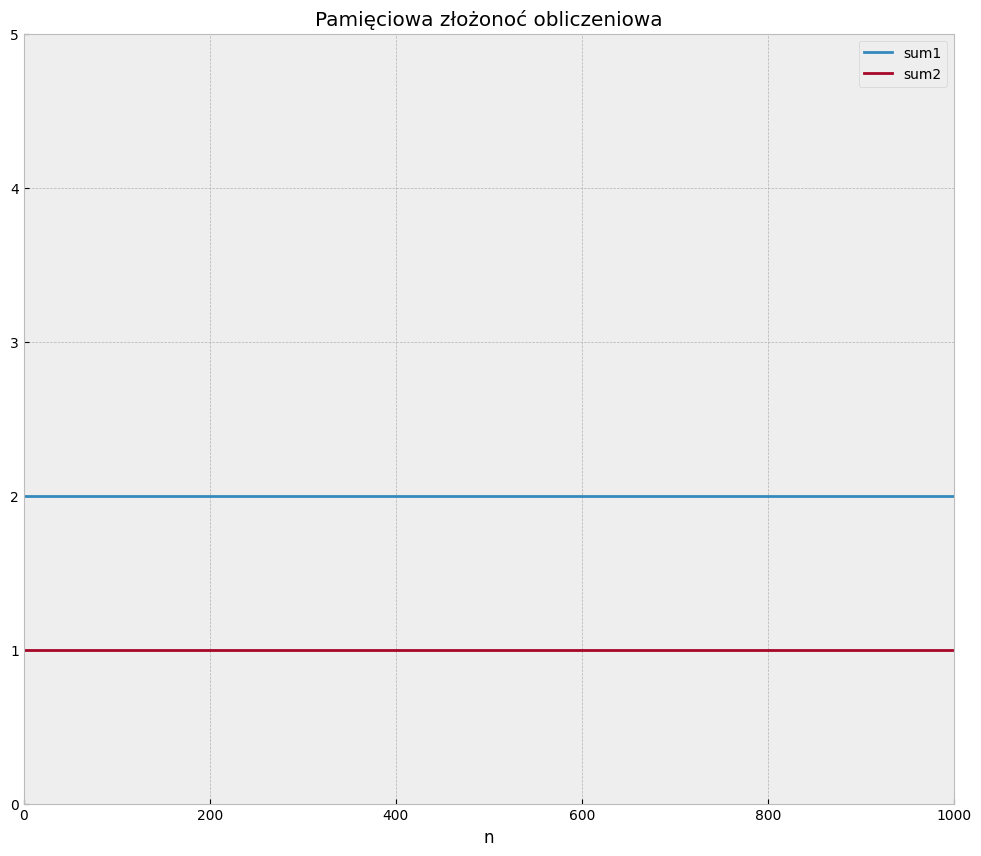

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Set up runtime comparisons
n = np.linspace(1,1000,1000)
labels = ['sum1','sum2']
big_o = [2*np.ones(n.shape),np.ones(n.shape)]

# Plot setup
plt.figure(figsize=(12,10))
plt.ylim(0, 5)
plt.xlim(0, 1000)

for i in range(len(big_o)):
    plt.plot(n,big_o[i],label = labels[i])

plt.legend(loc=0)
plt.title('Pamięciowa złożonoć obliczeniowa')
plt.xlabel('n');

Wykresy dobrze oddają charakter obu algorytmów.

Ale mamy jeszcze do tego odpowiedni zapis.

To są przecież wykresy funkcji, a do funkcji a na podstawowym kursi matematyki poznaliśmy różne sposoby reprezentowania funkcji - tabelka, wykres, ale też i wzór.

Liczba instrukcji podstawowych (w funkcji rozmiaru parametru wejściowego) dla `sum1`

$T(n) = 1 + n \cdot (1+1)$

$T(n) = 2 \cdot n + 1$

Liczba instrukcji podstawowych (w funkcji rozmiaru parametru wejściowego) dla `sum2`

$T(n) = 1 + 1 + 1$

$T(n) = 3$

Ale nas nie iteresuje dokładna liczba operacji. Nas interesuje jak szybko ta liczba rośnie wraz ze wzrostem `n`. Czyli, czy liczba opracji stoi w miejscu wraz ze wzrostem `n` czy się zmienia. A jeżeli się zmienia to jak szybko.

A o tym informuje nas dominujący czynnik we wzorze na złożoność. Dominujący czynnik to ten, który wraz ze wzrostem `n` zaczyna odgrywać największy wpływ na wartość, podczas gdy inne stają się coraz mniej zauważalne.

Spójrzmy na 
$$T(n) = 2 \cdot n + 1$$

Mamy tutaj dwa czynniki $2\cdot n$ i $1$.

Jaki jest ich wpływ do ostatecznego wynik wraz ze wzrostem `n`?

| n | $2\cdot n$ | 1 | wynik |
| --- | --- | --- | --- |
| 1 | 2 | 1 | 3 |
| 10 | 20 | 1 | 21 |
| 100 | 200 | 1 | 201 |
| 1000 | 2000 | 1 | 2001 |
| 10000 | 20000 | 1| 20001 |

Zdecydowanie $2\cdot n$ jest dominującym czynnkiem.

A w $2\cdot n$ dominujący jest $n$. Bo nie ważne czy mówimy o **dwóch** tysiącach, czy o **dwóch** milardach. Ważne, że mówimy o **tysiącach**, czy **miliardach**.

Podsumowując dominującym czynnikiem w `sum1` jest $n$, co zapisujemy:

$$f(n) = n$$

a w algorytmice:
$$O(n)$$

gdzie to co w nawiasach jest po prostu dominującym czynnikiem ze wzoru. Tą konkretną złożoność nazywamy **liniową**.

A jak to wygląda w przypadku `sum2` ?

$$T(n) = 3$$

$$ f(n) = 1 $$

$$O(1)$$

Taką złożoność obliczeniową nazywamy **stałą**

Na tym polega notacja dużego O.

Do najpopularniejszych złożoności obliczeniowych należą:

<table>
<tr>
    <th><strong>Big-O</strong></th>
    <th><strong>Nazwa</strong></th>
</tr>
<tr>
    <td>$1$</td>
    <td>Stała (<i>ang. constant</i>)</td>
</tr>
<tr>
    <td>$\log{n}$</td>
    <td>Logarytmiczna (<i>ang. logarithmic</i>)</td>
</tr>
    <tr><td>$n$</td>
    <td>Liniowa (<i>ang. linear</i>)</td>
</tr>
    <tr><td>$n\cdot\log{n}$</td>
    <td>Liniowo-Logarytmiczna aka Quasi-liniowa (<i>ang. Log Linear</i>)</td>
</tr>
    <tr><td>$n^2$</td>
    <td>Kwadratowa (<i>ang. quadratic</i>)</td>
</tr>
    <tr><td>$n^3$</td>
    <td>Sześcienna (<i>ang. cubic</i>)</td>
</tr>
</tr>
    <tr><td>$n^c$</td>
    <td>Wielomianowa (<i>ang. polinomial</i>)</td>
</tr>
    <tr><td>$2^n$</td>
    <td>Wykładnicza (<i>ang. exponential</i>)</td>
</tr>
</table>

Nanieśmy je na wykres.

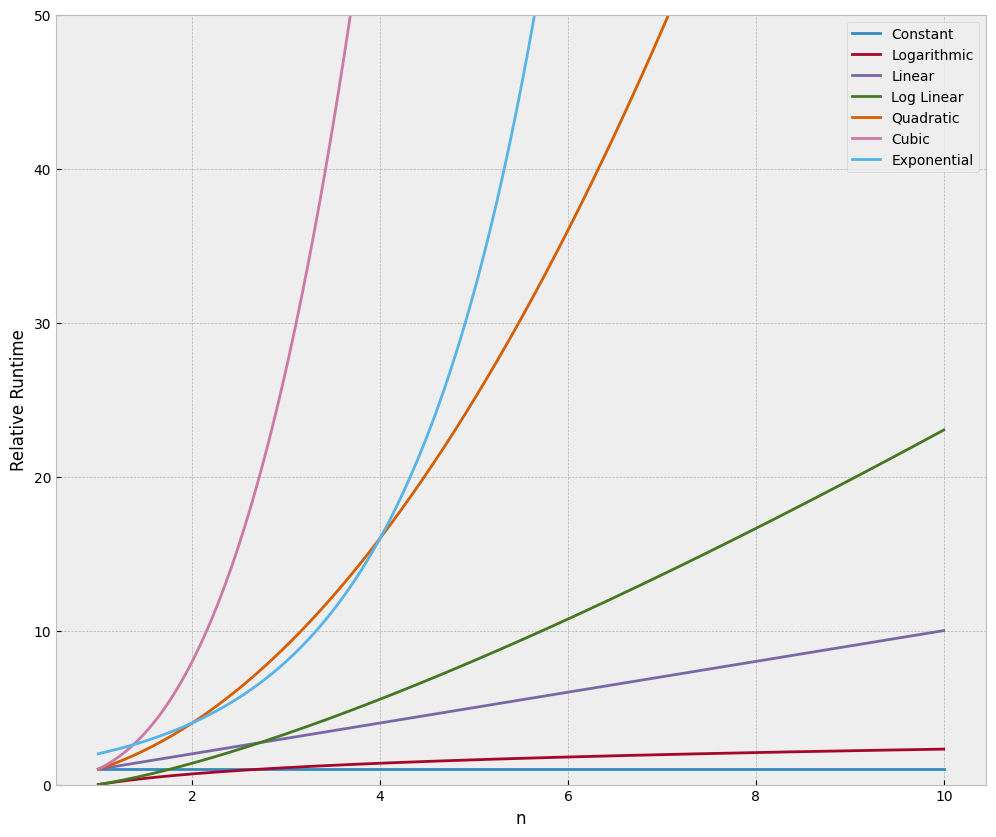

In [34]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Set up runtime comparisons
n = np.linspace(1,10,1000)
labels = ['Constant','Logarithmic','Linear','Log Linear','Quadratic','Cubic','Exponential']
big_o = [np.ones(n.shape),np.log(n),n,n*np.log(n),n**2,n**3,2**n]

# Plot setup
plt.figure(figsize=(12,10))
plt.ylim(0,50)

for i in range(len(big_o)):
    plt.plot(n,big_o[i],label = labels[i])


plt.legend(loc=0)
plt.ylabel('Relative Runtime')
plt.xlabel('n');

I przeważnie nas interesuje tylko to co dzieje się na prawo, w nieskończoność.

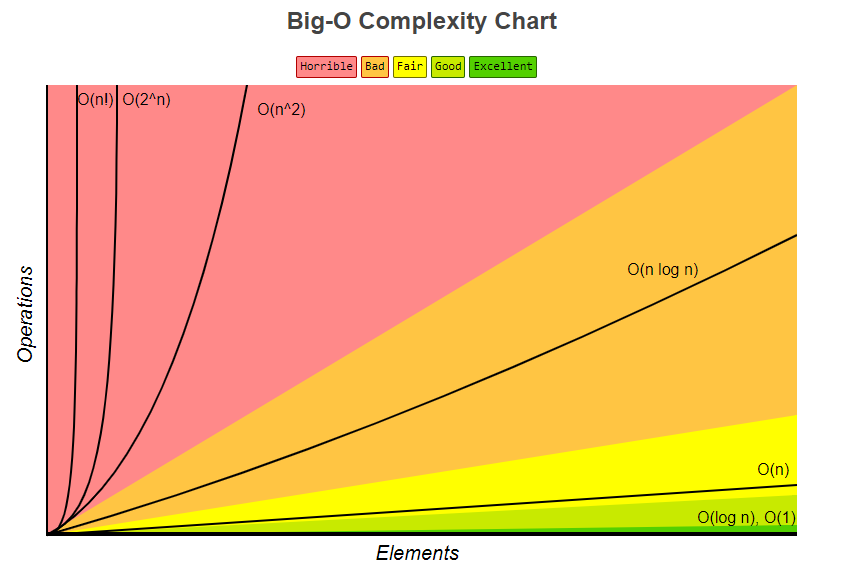
https://www.bigocheatsheet.com/

#### Zadanie 3
Napisz funkcję liczącą silnie zadanego parametru.

In [39]:
# Iteracyjnie
def factorial_iter(n: int) -> int:
    res = 1  # 1

    # n razy
    for num in range(1, n+1):  # 1 - na przypisanie do num
        res = res * num # 1 - na wymnnożenie, 1- na przypisanie res

    return res

In [38]:
factorial_iter(5)

120

### Oszacowanie złożoności obliczeniowej wersji iteracyjnej algorytmu

**Analitycznie**:

Liczba instrukcji podstawowych (w funkcji rozmiaru parametru wejściowego)

$T(n) = 1 + n \cdot (1+1+1)$

$T(n) = 3 \cdot n + 1$

Czynnik dominujący w funkcji T(n) to n

$f(n) = n$  

$O(n)$ - liniowa złożoność obliczeniowa

**Heurystycznie**:

Zauważamy, że w algorytmie występuje pętla po wartościach od 1 do n, gdzie n to parametr wejściowy.
Dlatego złożoność obliczoniowa algorytmu to O(n)